<a href="https://colab.research.google.com/github/318245915/Reconocimiento-de-Patrones-y-Aprendizaje-Automatizado/blob/main/Tarea_6_2_Redes_neuronales_multicapa_(fronteras_no_lineales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1
Entra en el siguiente enlace https://playground.tensorflow.org/ y configura los hiperparámetros de una red neuronal multicapa para separar las clases del dataset spiral, guarda el enlace y la captura de pantalla de tu entrenamiento y pégalos en un notebook de jupyter.

[ENLACE:](https://playground.tensorflow.org/#activation=tanh&batchSize=13&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=20&networkShape=4,2&seed=0.49984&showTestData=false&discretize=false&percTrainData=40&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
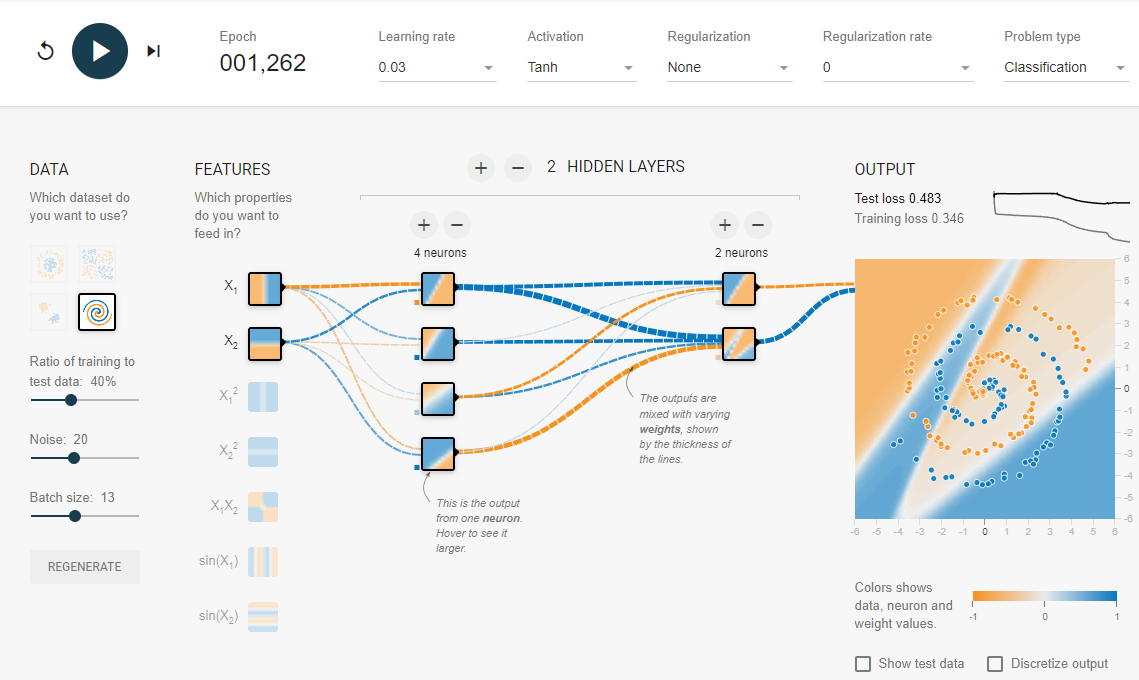

# 2
Elabora el código en python con keras de un modelo de red neuronal para el mismo dataset, en este caso debes generar tus datos. Entrena el modelo con diferentes configuraciones y grafica los puntos del dataset y la frontera de decisión de tu modelo.

2107/2107 [==============================] - 3s 1ms/step


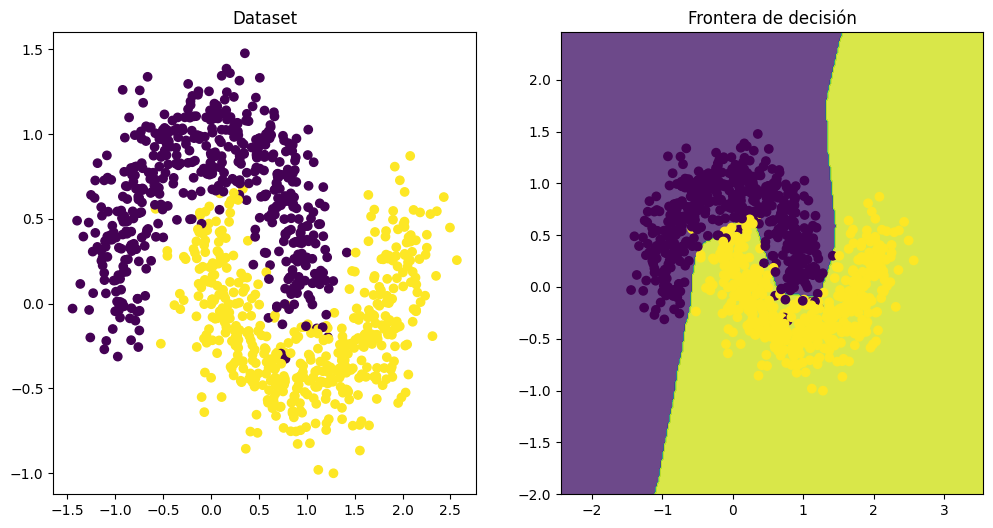

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generar datos
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Crear modelo
model = Sequential([
    Dense(32, input_shape=(2,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Graficar puntos y frontera de decisión
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dataset')

plt.subplot(1, 2, 2)
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predicciones como probabilidades
Z = (Z > 0.5).astype(int)  # Aplicar umbral para obtener clases binarias
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Frontera de decisión')
plt.show()


# 3
(Opcional) Selecciona otro dataset que no sea linealmente separable, y desarrolla los pasos 1 y 2 nuevamente.

1506/1506 [==============================] - 3s 2ms/step


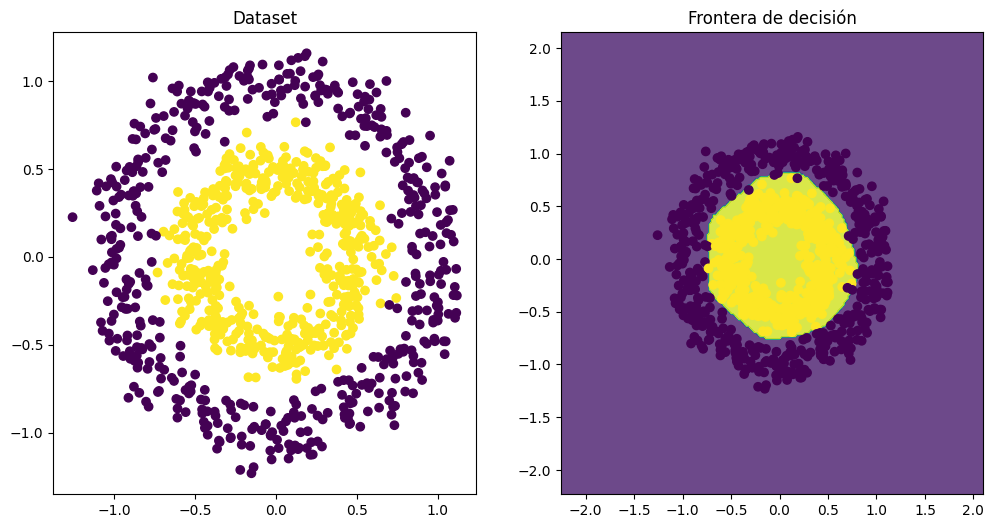

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generar datos
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Crear modelo
model = Sequential([
    Dense(32, input_shape=(2,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Graficar puntos y frontera de decisión
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dataset')

plt.subplot(1, 2, 2)
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predicciones como probabilidades
Z = (Z > 0.5).astype(int)  # Aplicar umbral para obtener clases binarias
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Frontera de decisión')
plt.show()
